In [4]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------- 165.5/165.5 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.0 MB 8.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 11.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/8.0 MB 11.3 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.0 MB 11.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/8.0 MB 11.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.0/8.0 MB 11.1 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.0 MB 11.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/8.0 MB 11.1 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 11.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/8.0 MB 11.0 MB/s eta 0:00:01
   ------

In [31]:
#conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


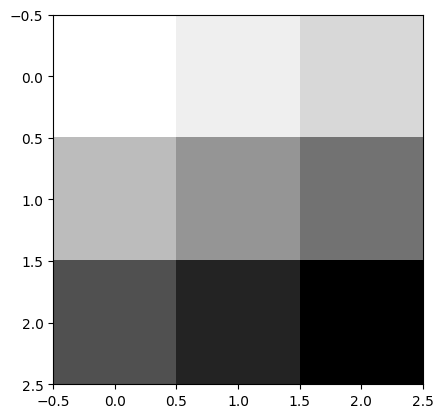

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


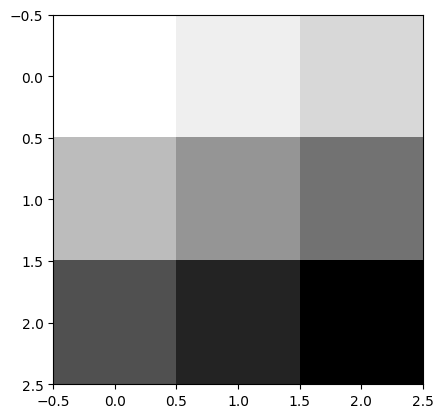

In [32]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)
print(image)
print(image.shape)  # (1, 3, 3, 1), Rank=4, (4차원)
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()
print(image)
print(image.shape)  # (1, 3, 3, 1), Rank=4, (4차원)
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


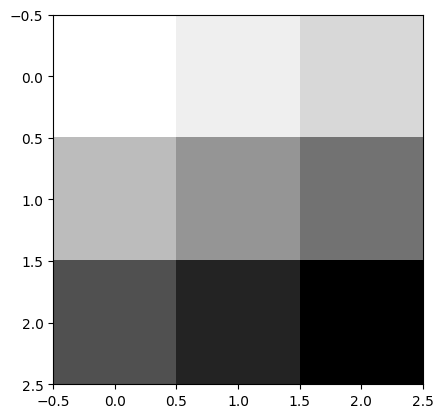

In [33]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)
print(image)
print(image.shape)  # (1, 3, 3, 1), Rank=4, (4차원)
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


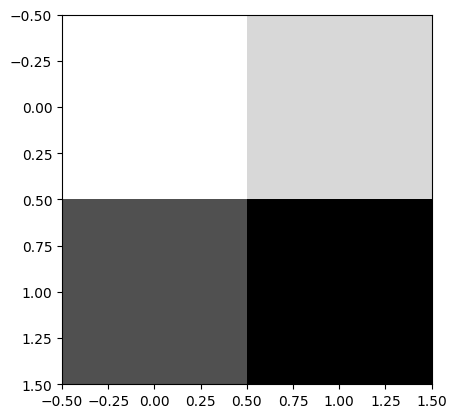

In [34]:
# CNN(Convolutional Neural Network)
# conv2d layer , filter : (2,2,1,1), strides : 1

# 입력 이미지 : (1,3,3,1), (N,H,W,C)
# 1 : 이미지의 갯수
# 3 : 가로 크기
# 3 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3

# filter : (2,2,1,1)
# 2 : 가로 크기
# 2 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3
# 1 : filter 의 갯수

# (N - F)/strides + 1
# 출력 이미지 : (3 - 2)/1 + 1 = 2, zero padding을 안했을 때 (padding='VALID')
# (1,3,3,1) ---> (1,2,2,1)

# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1],padding="VALID")
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)

# 시각화
plt.imshow(conv2d_image.reshape(2,2), cmap="Greys")
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


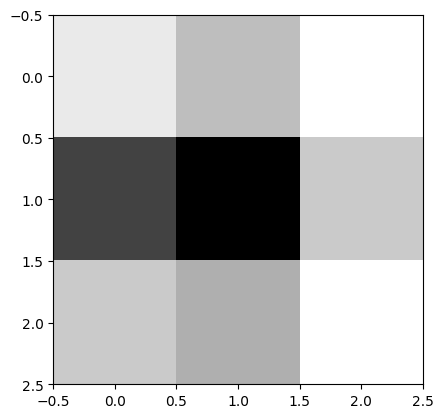

In [9]:
# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1],padding="SAME")
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)

# 시각화
plt.imshow(conv2d_image.reshape(3,3), cmap="Greys")
plt.show()

In [16]:
# conv2d layer, 3 filters, zero padding(padding='SAME')
# image : (1,3,3,1), filter : (2,2,1,3) , strides = (1,1,1,1)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],     
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.numpy())
print(weight.shape) # (2, 2, 1, 3)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape) # (1, 3, 3, 3)

# 시각화
conv2d_image = np.swapaxes

[[[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]


 [[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]]
(2, 2, 1, 3)
[[[[ 10. 100. -10.]
   [  4.  40.  -4.]]

  [[  3.  30.  -3.]
   [  1.  10.  -1.]]]]
(1, 2, 2, 3)


[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


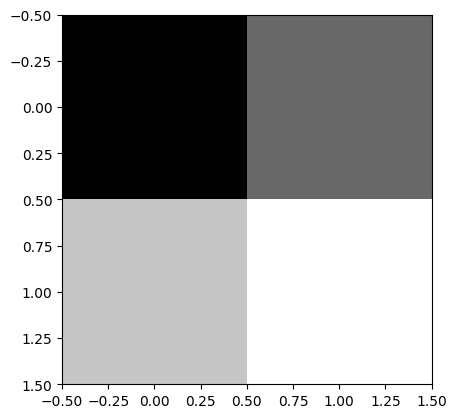

In [17]:
# max pooling
image  = np.array([[[[4.],[3.]],
                    [[2.],[1.]]]],dtype=np.float32)
print(image)
print(image.shape) 
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [18]:
# padding='VALID'  , zero padding을 하지 않음  , (1,2,2,1) --> (1,1,1,1)
# (N - F)/strides + 1 , F: kernel size(ksize)
# (2 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
print(pool.numpy()) # [[[[4.]]]]
print(pool.shape)  # (1, 1, 1, 1

[[[[4.]]]]
(1, 1, 1, 1)


In [19]:
# padding='SAME'  , zero padding을 했을 때  , (1,2,2,1) --> (1,2,2,1)
# (N - F)/strides + 1 , F: kernel size(ksize)
# (2+1 - 2)/1 + 1 = 2
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')
print(pool.numpy()) # 
print(pool.shape)   # (1, 2, 2, 1)

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


11490434/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(28, 28)
2


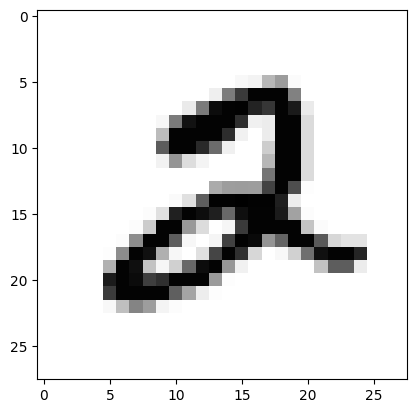

In [20]:
# MIST imgae data 처리
# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

image = x_train[5]
print(image.shape)
print(y_train[5])  # 숫자 2

plt.imshow(image,cmap='Greys')
plt.show()

In [21]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


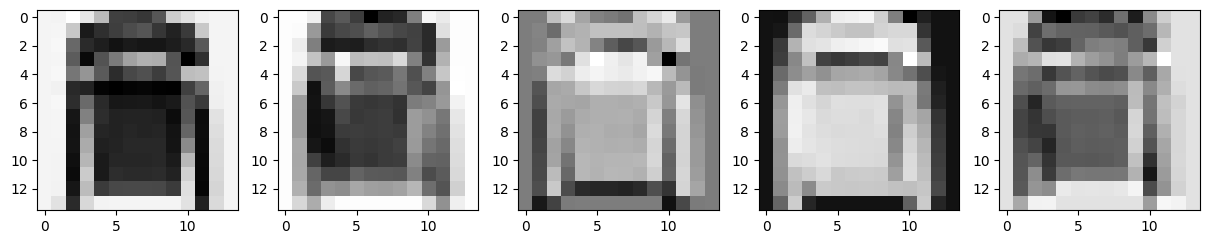

In [28]:
#### MNIST conv2d layer
# image : (1,28,28,1)
# filter : (3,3,1,5) , 필터 5개
# stride : (1,2,2,1) , padding = 'SAME'
# 출력 이미지 : (28+1 - 3)/2 + 1 = 14
# (1,28,28,1) --> (1,14,14,5)

img = image.reshape(-1,28,28,1)
print(img.shape) # (1, 28, 28, 1)

W = tf.Variable(tf.random.normal([3,3,1,5]),name='weight') # filter = weight
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image.shape)     # (1, 14, 14, 5)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(conv2d_image)
print(conv2d_image.shape) # (5,14,14,1)

plt.figure(figsize=(15,15))
for i,one_image in enumerate(conv2d_image):
    #print(one_image)
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(28, 28)
2


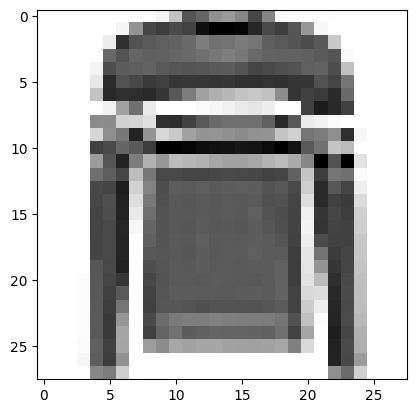

In [22]:
# MIST imgae data 처리
# mnist 데이터 가져오기
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

image = x_train[5]
print(image.shape)
print(y_train[5])  # 숫자 2

plt.imshow(image,cmap='Greys')
plt.show()

(1, 7, 7, 5)
(5, 7, 7, 1)


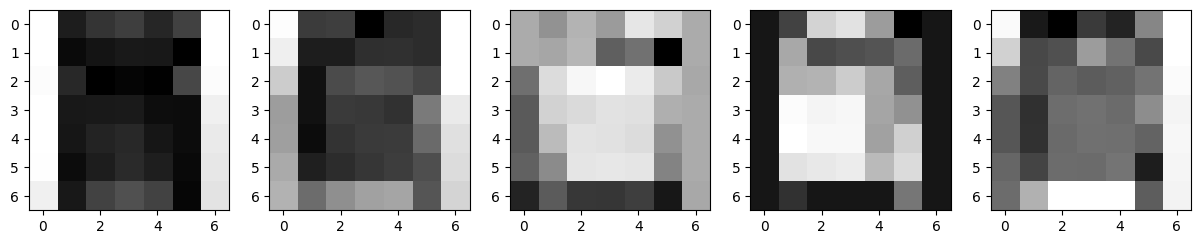

In [29]:
# MNIST max_pool layer
# conv2d image : (1, 14, 14, 5)
# ksize : (1,2,2,1), strides :(1,2,2,1), padding='SAME'
# 출력 이미지 : (14+1 - 2)/2 + 1 = 7
# (1, 14, 14, 5) --> (1, 7, 7, 5)

pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

pool_img = pool.numpy()
print(pool_img.shape)   # (1, 7, 7, 5)

# 시각화
pool_image = np.swapaxes(pool_img,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(pool_image)
print(pool_image.shape) # (5, 7, 7, 1)

plt.figure(figsize=(15,15))
for i,one_image in enumerate(pool_image):
    #print(one_image)
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(7,7),cmap='Greys')
plt.show() 